**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Alex Franz
- Bryant Tan
- Cole Carter
- Henri Schulz

# Research Question

Does a higher Center for World University Rankings ranking increase financial return on invest (ROI) at a US university in 2018-2019 where financial ROI is measured by the cost of tuition, loan repayment rate, average debt, and post-graduation earnings ?



## Background and Prior Work

### Introduction to the Topic


The influence of the prestige of a university on career success is a significant area of research, especially in fields like engineering where educational pedigree may impact job opportunities and earnings potential. The discussion typically revolves around whether the advantages of attending a top-tier university, such as enhanced learning environments, better networking opportunities, and elevated prestige, translate into tangible career benefits like higher salaries, job satisfaction, and overall career advancement. Generally, attending a prestigious institution has been associated with higher success rates, but the question remains: does the cost of tuition justify these outcomes?


### Prior Research and Findings


An article provided by NBC News notes significant differences in starting salaries among graduates from universities of varying prestige. For instance, graduates from the University of Southern California have a notable starting salary advantage over those from lesser-known institutions and that graduates from Yale have an average starting salary of `$68,300`, significantly higher than the `$32,000` starting salary for graduates from Mississippi Valley State University. <sup id="cite_ref-1">[1](#cite_note-1)</sup> This highlights the economic benefit of attending more prestigious universities.


Further research indicates that while the cost of attending college has dramatically increased, the financial benefits such as earnings growth have not kept pace. Specifically, college costs have risen by 169% over the past four decades, while earnings for workers between the ages of 22 and 27 have increased by just 19%, according to an analysis of U.S. Census, Bureau of Labor Statistics, and National Center for Education Statistics data. <sup id="cite_ref-2">[2](#cite_note-2)</sup> This disparity raises questions about the economic return on investment of higher education, particularly from less prestigious institutions.


Additionally, a study exploring the quality of working life among university academics reveals that work-life balance, job and career satisfaction, and working conditions significantly affect employee commitment and stress levels, ultimately impacting overall well-being. It emphasizes that higher-ranked universities tend to offer better job security and more supportive working conditions, which not only enhance personal well-being but also improve job satisfaction <sup id="cite_ref-3">[3](#cite_note-3)</sup> This research underscores the importance of university environment and job security, particularly in contrasting permanent versus temporary academic roles, and highlights the subtle effects of university prestige not only on earnings but also on job satisfaction and personal well-being.


### Relevance to Current Project


This previous work sets a foundational understanding that while the reputation of an educational institution may not universally guarantee better job prospects or earnings, it does provide certain groups with measurable advantages. The current project can build on these findings by more specifically analyzing how these outcomes vary among engineering graduates, where the impact of a university's rank might be more pronounced due to the technical and often competitive nature of the field.


### References
- <sup id="cite_note-1">1</sup> [NBC News](https://www.nbcnews.com/business/business-news/does-it-even-matter-where-you-go-college-here-s-n982851) Report on the influence of university prestige on starting salaries and career success.
- <sup id="cite_note-2">2</sup> [CNBC News](https://www.cnbc.com/2021/11/02/the-gap-in-college-costs-and-earnings-for-young-workers-since-1980.html) College costs have increased by 169% since 1980—but pay for young workers is up by just 19%: Georgetown report
- <sup id="cite_note-3">3</sup> [Research Gate](https://www.researchgate.net/publication/305689177_Quality_of_working_life_of_academics_and_researchers_in_the_UK_the_roles_of_contract_type_tenure_and_university_ranking) Fontinha, R., Van Laar, D., & Easton, S. (2018). *Quality of working life of academics and researchers in the UK: the roles of contract type, tenure and university ranking*. Studies in Higher Education, 43(4), 786–806.


# Hypothesis



We hypothesize that a higher university rank will correlate to a higher average return on investment because higher ranked colleges hold more merit in industry and academia, resulting in better opportunities for graduates from highly ranked colleges as compared to lower ranked colleges.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Department of Education College Scorecard 2018-2019
  - Link to the dataset: [https://collegescorecard.ed.gov/data/](https://collegescorecard.ed.gov/data/)
  - Number of observations: 6694
  - Number of variables: 3244
- Dataset #2
  - Dataset Name: Center for World University Rankings World University Rankings 2018-2019
  - Link to the dataset: [https://www.kaggle.com/datasets/erfansobhaei/ultimate-university-ranking](https://www.kaggle.com/datasets/erfansobhaei/ultimate-university-ranking)
  - Number of observations: 1000
  - Number of variables: 12

__Dataset #1 Description__

The Department of Education College Scorecard 2018-2019 includes 3244 variables from 6694 different colleges in the US regarding admissions, financial aid, earnings after college, student demographics, graduation rates, and student outcomes. We plan to use this dataset to extract the median cost of attendence, median debt, median earnings at 6, 8, and 10 years after college. With these metrics, we will be able to establish a quantitative heuristic for the return on investment of a given institution. To perform this analysis, we will have to filter our dataset to include only columns of potential interest, discard any resulting columns of interest with an excessive proportion of NaN values, and eliminate duplicate metrics across different columns to generate an accurate depiction of our desired metrics.

__Datset #2 Description__

The CWRU World University Rankings 2018-2019 will be used to identify the rankings of colleges. The most important metrics found in this dataset are string-formatted names, integer-formatted world ranking and national rankings, and float-formatted overall scores of the 1000 universities within the dataset. This dataset will be used to filter out the schools from the College Scorecard that data we want to include in our study using a DataFrame merge, as well as include ranking data in our overall combined dataset. The combined dataset will be sorted according to the institutions' world rank as determined by the CWUR rankings.


__Combined Dataset Description__

The combined dataset focuses on US institutions present in both the College Scorecard and CWUR datasets. It includes the following key variables:

- `institution`: The name of the college or university. 
- `avg_cost`: The average annual cost of attendance. 
- `supply_cost`: The cost of books and supplies. 
- `avg_debt`: The median debt of graduates. 
- `75%_earnings_8_yrs`: The earnings at the 75th percentile 8 years after enrollment. 
- `25%_earnings_8_yrs`: The earnings at the 25th percentile 8 years after enrollment. 
- `earnings_6_yrs`: The median earnings 6 years after enrollment. 
- `earnings_10_yrs`: The median earnings 10 years after enrollment. 
- `rank`: The national ranking of the institution according to CWUR.

__Data Cleaning Performed__

- Standardization: Institution names were standardized to ensure consistency across datasets.
- Filtering: The dataset was filtered to include only institutions present in the CWUR dataset.
- Handling Missing Values: Rows with missing values in key variables were dropped to ensure data quality.
- Numeric Conversion: All relevant columns were converted to numeric types for analysis.

## Imports and Standardization Function

In [1]:
# Imports 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import re 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardizes instritution, used for filtering Scorecard data based on ranking data
def institution_standardize(string):
    string = string.lower()
    string = string.replace(',', '')
    string = string.replace(' ', '')
    string = re.sub(r'[^a-zA-Z0-9]', '', string)
    return string

## Center for World University Rankings 2018-2019

In [2]:
# Importing Data
rankings = pd.read_csv("CWUR_2018-2019.csv")

# Gathering Ranking data we need to filter the Scorecard data
rankings = rankings[rankings['Location'] == 'USA']
rankings = rankings.loc[:,['Institution','National Rank']]
rankings = rankings.reset_index(drop=True)

# Standardizing ranking data
rankings['Institution'] = rankings['Institution'].apply(institution_standardize)
rankings['Institution'] = rankings["Institution"].astype('string')

rankings.head()

rankings.shape

(213, 2)

## Department of Education College Scorecard 

In [3]:
# Importing Data 
college_data = pd.read_csv("2018_2019_College_Data.csv")

# Creating copy dataframe, so we can use this to filter our original data with the original institution names
college_data_filter = college_data.copy()

# Standardizing copy Scorecard data
college_data_filter['INSTNM'] = college_data_filter['INSTNM'].apply(institution_standardize)
college_data_filter['INSTNM'] = college_data_filter['INSTNM'].astype('string')

# Filtering dataset to include only universities in the rankings dataset
filtered_college_data = college_data_filter[college_data_filter['INSTNM'].isin(rankings['Institution'])]

# Filtering dataset to only include desired columns
desired_cols = [
    'INSTNM','COSTT4_A','BOOKSUPPLY','GRAD_DEBT_MDN','PCT75_EARN_WNE_P8','PCT25_EARN_WNE_P8','MD_EARN_WNE_P6','MD_EARN_WNE_P10'
]
filtered_college_data = filtered_college_data.loc[:, desired_cols]
filtered_college_data.head()

/var/folders/3p/y0vk1fkd5sngg7zjfqnb2sv80000gn/T/ipykernel_17657/1626189113.py:2: DtypeWarning: Columns (1729,1909,1910,1911,1912,1913,2376,2377,2958) have mixed types. Specify dtype option on import or set low_memory=False.
  college_data = pd.read_csv("2018_2019_College_Data.csv")


,INSTNM,COSTT4_A,BOOKSUPPLY,GRAD_DEBT_MDN,PCT75_EARN_WNE_P8,PCT25_EARN_WNE_P8,MD_EARN_WNE_P6,MD_EARN_WNE_P10
1,universityofalabamaatbirmingham,24347.0,1200.0,22500,63552.0,28738.0,39271.0,46990.0
3,universityofalabamainhuntsville,23441.0,2034.0,21607,73997.0,29122.0,47533.0,54361.0
9,auburnuniversity,31282.0,1200.0,21281,76935.0,36231.0,49695.0,56933.0
58,universityofalaskafairbanks,18510.0,2000.0,19500,59768.0,19798.0,35456.0,43728.0
74,universityofarizona,26712.0,800.0,20171,76918.0,32696.0,43784.0,55205.0


In [4]:
filtered_college_data.shape

(162, 8)

## Combining Datasets ##

In [5]:
# Convert the list of institutions to a categorical data type with the desired order
filtered_college_data['INSTNM'] = pd.Categorical(filtered_college_data['INSTNM'], categories=rankings['Institution'], ordered=True)

# Sort the dataframe based on the ordered 'INSTNM' column
college_sorted = filtered_college_data.sort_values(by='INSTNM')

# Extracting indices to use to pull observations from the college_data dataframe we need
indices = college_sorted.index.to_list()

# Filtering out universities we aren't including in the study
college_data = college_data.iloc[indices]

# Gathering columns we need for EDA and adding rank column 
college_data = college_data.loc[:,desired_cols]
college_data = college_data.dropna().reset_index(drop=True)
college_data['NationalRank'] = college_data.index + 1

# Converting all columns to numeric values for EDA purposes
float_cols = ['COSTT4_A','BOOKSUPPLY','GRAD_DEBT_MDN', 'PCT75_EARN_WNE_P8', 'PCT25_EARN_WNE_P8','MD_EARN_WNE_P6','MD_EARN_WNE_P10']
college_data[float_cols] = college_data[float_cols].astype(float)
college_data['NationalRank'] = college_data['NationalRank'].astype(int)

# Renaming columns 
college_data.rename(
    columns={
        'INSTNM': 'institution',
        'COSTT4_A': 'avg_cost', 
        'BOOKSUPPLY': 'supply_cost',
        'GRAD_DEBT_MDN':'avg_debt',
        'PCT75_EARN_WNE_P8':'75%_earnings_8_yrs',
        'PCT25_EARN_WNE_P8':'25%_earnings_8_yrs',
        'MD_EARN_WNE_P6': 'earnings_6_yrs',
        'MD_EARN_WNE_P10':'earnings_10_yrs',
        'NationalRank':'rank'
        }
        , inplace=True
        )

# Final dataframe
college_data.head()

,institution,avg_cost,supply_cost,avg_debt,75%_earnings_8_yrs,25%_earnings_8_yrs,earnings_6_yrs,earnings_10_yrs,rank
0,Harvard University,71135.0,1000.0,13750.0,135753.0,45980.0,77816.0,84918.0,1
1,Stanford University,69109.0,1455.0,11750.0,166805.0,58448.0,88873.0,97798.0,2
2,Massachusetts Institute of Technology,67430.0,800.0,12500.0,169114.0,75080.0,112623.0,111222.0,3
3,University of California-Berkeley,36739.0,849.0,13478.0,117722.0,44547.0,65914.0,80364.0,4
4,Princeton University,66950.0,1050.0,10750.0,147835.0,56354.0,84713.0,95689.0,5


In [6]:
college_data.shape

(146, 9)

# Results

## Exploratory Data Analysis

### Predictor Distribution and Rank Correlation Exploration

First, we examine the summary statistics of the data.

In [7]:
college_data.describe()

,avg_cost,supply_cost,avg_debt,75%_earnings_8_yrs,25%_earnings_8_yrs,earnings_6_yrs,earnings_10_yrs,rank
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,40064.842466,1244.657534,20028.089041,88160.294521,38570.465753,54125.924658,65861.047945,73.500000
std,20389.795700,382.891133,3786.235191,23572.450931,9084.873360,14284.343141,15027.045740,42.290661
min,17582.000000,800.000000,10750.000000,55495.000000,19798.000000,31824.000000,42350.000000,1.000000
25%,23948.750000,1001.500000,17625.000000,72297.750000,32433.000000,43786.000000,54385.250000,37.250000
50%,29212.500000,1200.000000,20500.000000,83056.500000,37161.000000,51282.000000,63780.500000,73.500000
75%,65563.500000,1300.000000,22608.750000,97822.750000,43235.000000,60383.750000,74918.750000,109.750000
max,75735.000000,3750.000000,27000.000000,181259.000000,75080.000000,129420.000000,112166.000000,146.000000


From this, we deduce the following:

1. The mean for the average cost of the a university is substantially more than the median of the variable, indicating that there may right-hand outliers or a right-sided skew.
2. The standard deviation for supply cost is fairly low ($382) compared to the mean supply cost ($12,444), which is close to the median supply cost ($12000). Also, the intequartile range of the supply cost ($300) is less than the standard deviation, suggesting that there is fairly low variation for the majority of students in supply cost.
3. The average debt of students has a very high maximum value compared to the 3rd quartile, indicating at least one potential outliers.
4. For the supply cost, 75% quartile for the earnings at 8 years, the 25% quartile for the earnings at 8 years, the median earning at 6 years, and the median earnings at 10 years, the upper quartile range of each variable is substantially more than the interquartile range of each variable, indicating potential right-handed outliers.
5. We see that there are 146 ranks on a scale from 1 to 146, so we must determine whether there are any duplicate ranks or all rankings between 100 and 146 are unique.

To address the question of uniform distribution in obversation #5, we compute the numbers of unique ranks.

In [8]:
len(college_data['rank'].unique())

146

We find 146 unique ranks with a range of 146 rankings, indicating that each ranking between 1 and 146 inclusive is accounted for.



Next, we generate a pairplot to visualize the relationships between all variables of intereset anand visualize the distributions of each variable of interest.

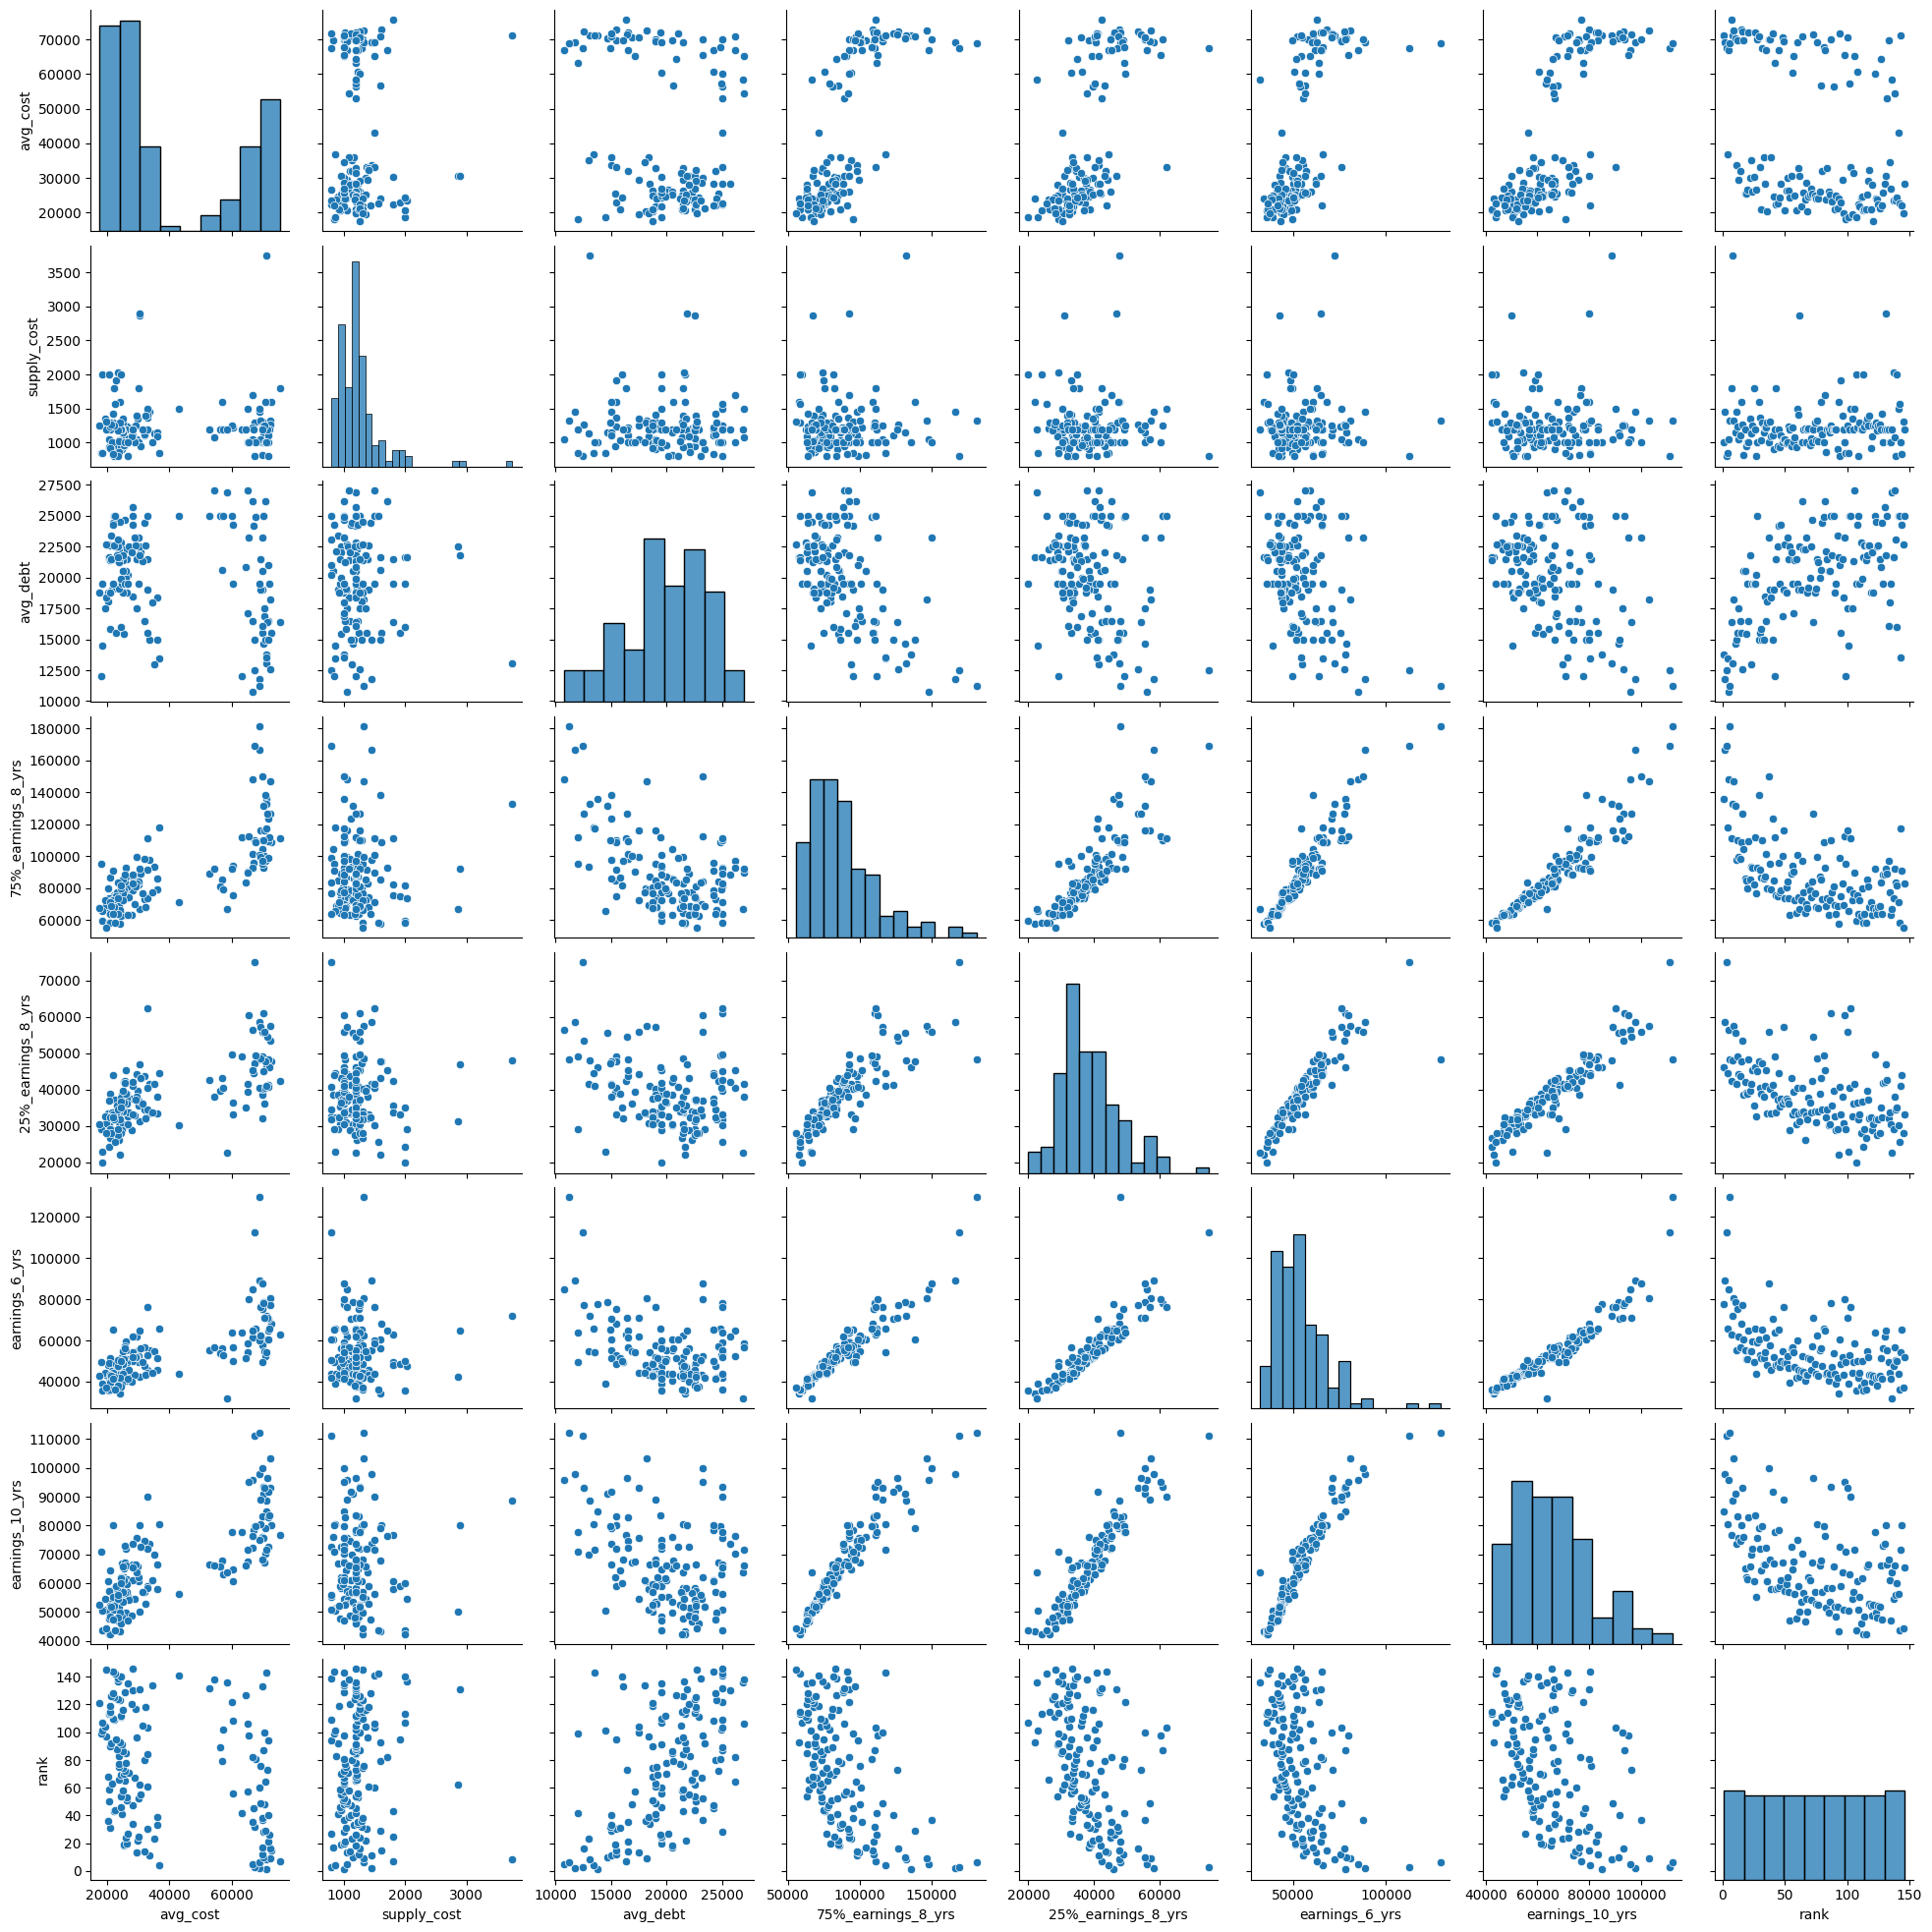

In [9]:
fig1 = sns.pairplot(college_data, diag_kind='hist')
plt.show()

In examining the results of the pairplot, we see a handful of important relationships.

1. We notice that the distribution of the average cost of a given univeristy is bimodal and appears uncorrelated to a university's rank. As a result, it will be helpful for us to later stratify our data into high-cost and low-cost universities and examine the effect of rank on price based off classification as either a higher-cost or lower-cost university.

2. We view a strong positive linear relationships between earnings at different points in time after graduation, indicating that a higher earning at one point in time correlates to a higher earning at another point in time.

3. There do seem to be some correlations between rank and our variables of interest, but we must investiage the strength of these correlations through further analysis.

4. There are clear outliers in supply cost and 6 year earnings.

We will explore the relationships highlighted by #3, and generate linear regression plots between rank (our dependent variable of interest) and each of our indicator variables of interest.

We start with examining 10 year earnings as a function of rank and find a moderate negative correlation between rank and earnings, indicating that 10 year earnings tend to be higher for higher-ranked universities.

Correlation Coefficient (rank vs earnings_10_yrs): -0.48021994251996464


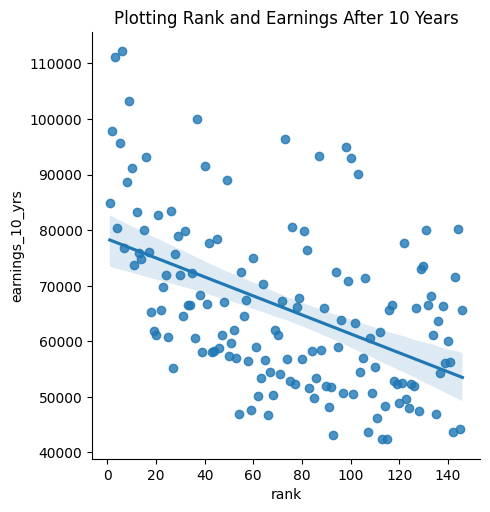

In [10]:
rankEarnings10 = sns.lmplot(x='rank', y='earnings_10_yrs', data=college_data)

correlation_coefficient = college_data['rank'].corr(college_data['earnings_10_yrs'])
print("Correlation Coefficient (rank vs earnings_10_yrs):", correlation_coefficient)
plt.title('Plotting Rank and Earnings After 10 Years')
plt.show()

Next, we examine 6 year earnings as a function of rank and find a moderate negative correlation between rank and earnings, indicating that 6 year earnings tend to be higher for higher-ranked universities.

Correlation Coefficient (rank vs earnings_6_yrs): -0.49078302032674315


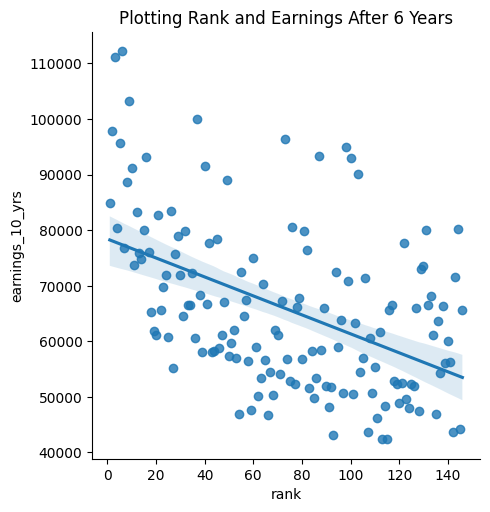

In [11]:
rankEarnings6 = sns.lmplot(x='rank', y='earnings_10_yrs', data=college_data)

correlation_coefficient = college_data['rank'].corr(college_data['earnings_6_yrs'])
print("Correlation Coefficient (rank vs earnings_6_yrs):", correlation_coefficient)
plt.title('Plotting Rank and Earnings After 6 Years')
plt.show()

Next, we examine the first quartile of 6 year earnings as a function of rank and find a moderate negative correlation between rank and earnings, indicating that the first quartile of 6 year earnings tend to be higher for higher-ranked universities.

Correlation Coefficient (rank vs 25%_earnings_8_yrs): -0.4701754970069599


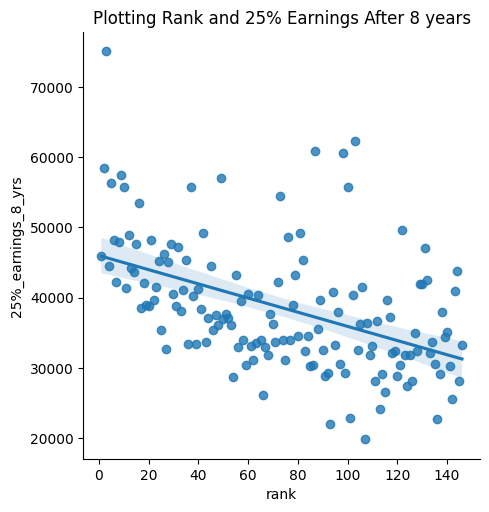

In [12]:
rankEarnings258 = sns.lmplot(x='rank', y='25%_earnings_8_yrs', data=college_data)

correlation_coefficient = college_data['rank'].corr(college_data['25%_earnings_8_yrs'])
print("Correlation Coefficient (rank vs 25%_earnings_8_yrs):", correlation_coefficient)
plt.title('Plotting Rank and 25% Earnings After 8 years')
plt.show()

Next, we examine the third quartile of 6 year earnings as a function of rank and find a moderate negative correlation between rank and earnings, indicating that the third quartile of 6 year earnings tend to be higher for higher-ranked universities.

Correlation Coefficient (rank vs 75%_earnings_8_yrs): -0.5471114144523072


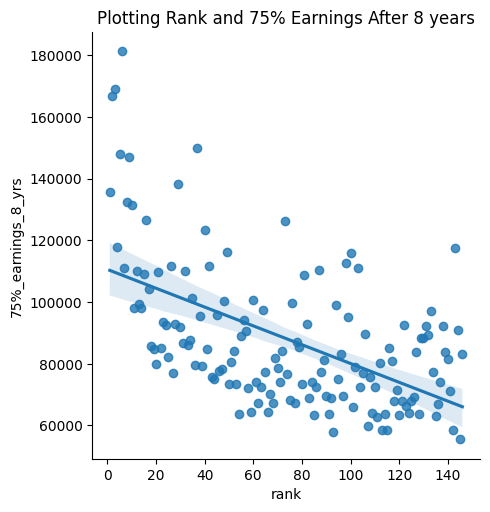

In [13]:
rankEarnings758 = sns.lmplot(x='rank', y='75%_earnings_8_yrs', data=college_data)

correlation_coefficient = college_data['rank'].corr(college_data['75%_earnings_8_yrs'])
print("Correlation Coefficient (rank vs 75%_earnings_8_yrs):", correlation_coefficient)
plt.title('Plotting Rank and 75% Earnings After 8 years')
plt.show()

Next, we examine the median debt as a function of rank and find a moderate positive correlation between rank and debt, indicating that the median debt tends to be lower for higher-ranked universities.

Correlation Coefficient (rank vs avg_debt): 0.5362802795286117


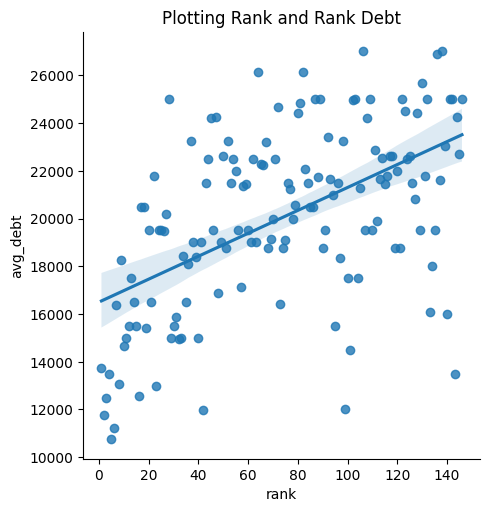

In [14]:
rankDebt = sns.lmplot(x='rank', y='avg_debt', data=college_data)

correlation_coefficient = college_data['rank'].corr(college_data['avg_debt'])
print("Correlation Coefficient (rank vs avg_debt):", correlation_coefficient)
plt.title('Plotting Rank and Rank Debt')
plt.show()

Next, we examine the supply cost of a university as a function of its rank and find a very weak correlation, indicating that rank has little effect on the supply cost of a university.

Correlation Coefficient (rank vs supply_cost): 0.04801008338637106


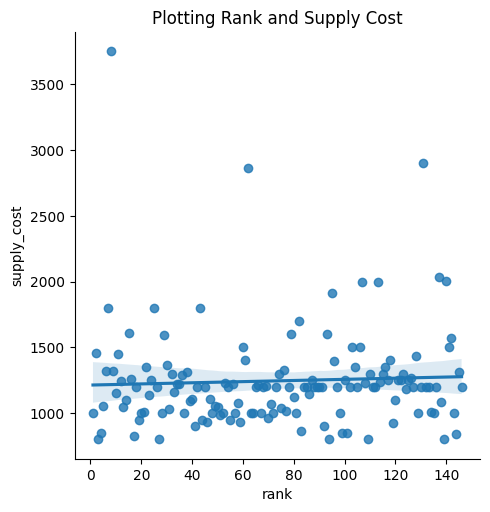

In [15]:
rankSupplyCost = sns.lmplot(x='rank', y='supply_cost', data=college_data)

correlation_coefficient = college_data['rank'].corr(college_data['supply_cost'])
print("Correlation Coefficient (rank vs supply_cost):", correlation_coefficient)
plt.title('Plotting Rank and Supply Cost')
plt.show()

Lastly, due to the bimodal nature of the average cost disribution, we will cluster our data into a higher-cost and lower-cost category.

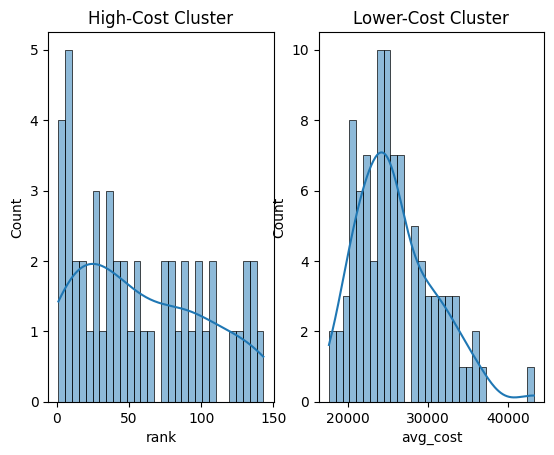

In [16]:
# Reshape data for clustering
cost_data = college_data['avg_cost'].values.reshape(-1, 1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(cost_data)
college_data['cost_cluster'] = kmeans.labels_

# Separate the clusters
cluster_0 = college_data[college_data['cost_cluster'] == 0]
cluster_1 = college_data[college_data['cost_cluster'] == 1]

[figs, axs] = plt.subplots(nrows=1, ncols=2)

# Plot histogram with KDE for Cluster 0
sns.histplot(cluster_0['rank'], bins=30, kde=True, ax=axs[0], )
axs[0].set_title('High-Cost Cluster')

# Plot histogram with KDE for Cluster 1
sns.histplot(cluster_1['avg_cost'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Lower-Cost Cluster')
plt.show()

We find that the resultant distributions of these higher-cost and lower-cost clusters are much more normal.

Next, we plot the average cost in each of these cost clusters as a function of rank.

Correlation coefficient between rank and avg_cost for Higher-Cost Cluster: -0.2774
Correlation coefficient between rank and avg_cost for Lower-Cost Cluster: -0.5822


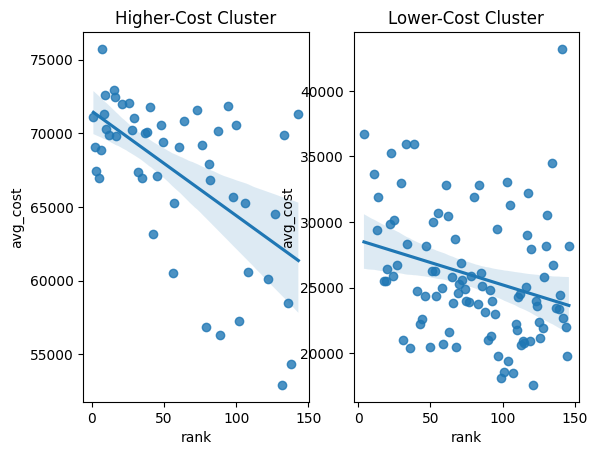

In [17]:
[fig, axs] = plt.subplots(nrows = 1, ncols = 2)

# Plotting rank vs avg_cost for each cluster
sns.regplot(data=cluster_0, x='rank', y='avg_cost', ax=axs[0])
axs[0].set_title('Higher-Cost Cluster')

sns.regplot(data=cluster_1, x='rank', y='avg_cost', ax=axs[1])
axs[1].set_title('Lower-Cost Cluster')

correlation_0 = cluster_0[['rank', 'avg_cost']].corr().iloc[0, 1]
correlation_1 = cluster_1[['rank', 'avg_cost']].corr().iloc[0, 1]

print(f"Correlation coefficient between rank and avg_cost for Higher-Cost Cluster: {correlation_1:.4f}")
print(f"Correlation coefficient between rank and avg_cost for Lower-Cost Cluster: {correlation_0:.4f}")

plt.show()

We find that for the lower-cost cluster, there is a moderate negative correlation between average cost and rank but that for the high cost cluster, there is a weaker negative correlation between rank and average cost. This suggest that in the lower-cost cluster of universites, being better ranked hasis more likely to correlate to a higher cost of attendance than at lower-cost university.

In conclusion, we see rank seems to have a positive effect earnings after 10 years, earnings after 8 years, 25% earnings after 8 years, 75% earnings after 8 years and reduce median debt. However, supply cost and rank seem to have no correlation at all, and the relationship between rank and average cost of attendance differs between higher-cost and lower-cost universities.

# Return on Investion (ROI) Analysis 

$$
\text{ROI 10 Years} = \left( \frac{{\text{earnings\_10\_yrs} \times 10 - (\text{avg\_cost} \times 4 + \text{supply\_cost} \times 4 + \text{avg\_debt})}}{{\text{avg\_cost} \times 4 + \text{supply\_cost} \times 4 + \text{avg\_debt}}} \right) \times 100
$$

In [18]:
# def calculate_roi(df):
#     def calculate_row_roi(row):
#         avg_cost = row['avg_cost']
#         supply_cost = row['supply_cost']
#         avg_debt = row['avg_debt']
#         earnings_10_yrs = row['earnings_10_yrs']
#         earnings_6_yrs = row['earnings_6_yrs']
#         num_years = 4  # Assuming a 4-year degree
#         interest_rate = 0.0599
#         loan_term_years = 10

#         # Calculate Total Costs
#         total_coa = avg_cost * num_years
#         total_supplies_cost = supply_cost * num_years
#         total_cost = total_coa + total_supplies_cost

#         # Calculate Total Debt Repayment with Interest
#         monthly_interest_rate = interest_rate / 12
#         total_debt_repayment = avg_debt * ((monthly_interest_rate * (1 + monthly_interest_rate)**(loan_term_years * 12)) / ((1 + monthly_interest_rate)**(loan_term_years * 12) - 1)) * loan_term_years * 12

#         # Calculate Net Earnings
#         net_earnings_10_years = earnings_10_yrs * 10 - total_cost - total_debt_repayment

#         # Calculate ROI
#         roi_10_years = (net_earnings_10_years / total_cost) * 100

#         return roi_10_years

#     # Apply the function to each row and create a new column with the ROI
#     df['10_years_roi'] = df.apply(lambda row: calculate_row_roi(row), axis=1)

#     return df

# college_data = calculate_roi(college_data)

In [19]:
college_data.head()

,institution,avg_cost,supply_cost,avg_debt,75%_earnings_8_yrs,25%_earnings_8_yrs,earnings_6_yrs,earnings_10_yrs,rank,cost_cluster
0,Harvard University,71135.0,1000.0,13750.0,135753.0,45980.0,77816.0,84918.0,1,0
1,Stanford University,69109.0,1455.0,11750.0,166805.0,58448.0,88873.0,97798.0,2,0
2,Massachusetts Institute of Technology,67430.0,800.0,12500.0,169114.0,75080.0,112623.0,111222.0,3,0
3,University of California-Berkeley,36739.0,849.0,13478.0,117722.0,44547.0,65914.0,80364.0,4,1
4,Princeton University,66950.0,1050.0,10750.0,147835.0,56354.0,84713.0,95689.0,5,0


In [20]:
# X = college_data['rank']  # Independent variable
# y = college_data['10_years_roi']  # Dependent variable
# X = sm.add_constant(X) 

# model = sm.OLS(y, X).fit()

# # Print the summary of the regression model
# print(model.summary())

# # Plotting the scatter plot with regression line using sns.lmplot()
# plt.figure(figsize=(12, 8))
# sns.lmplot(x='rank', y='10_years_roi', data=college_data)
# plt.title('Rank vs 10 Years ROI with Regression Line')
# plt.xlabel('Rank')
# plt.ylabel('10 Years ROI')
# plt.show()

# Assuming 'data' is your final cleaned DataFrame


In [21]:
features = ['avg_cost', 'supply_cost', 'avg_debt', '75%_earnings_8_yrs', '25%_earnings_8_yrs', 'earnings_6_yrs', 'earnings_10_yrs']
x = college_data.loc[:, features].values

# Standardizing the features

In [22]:
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a new DataFrame with the principal components

In [23]:
pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
pca_df['institution'] = college_data['institution']
pca_df['rank'] = college_data['rank']



# Applying K-means

In [24]:
kmeans = KMeans(n_clusters=3)  # You might want to vary the number of clusters based on your analysis
cluster_labels = kmeans.fit_predict(principal_components)

# Add the cluster labels to the PCA DataFrame

In [25]:
pca_df['cluster'] = cluster_labels

# Analyzing the clusters

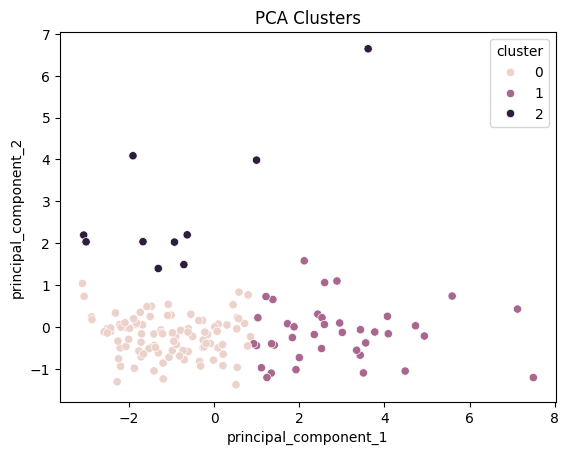

In [26]:
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df)
plt.title('PCA Clusters')
plt.show()

# Analyzing clusters

In [27]:
cluster_analysis = pca_df.groupby('cluster').agg({
    'rank': ['mean', 'median', 'min', 'max'],
    'principal_component_1': ['mean'],
    'principal_component_2': ['mean']
})
print(cluster_analysis)

              rank                 principal_component_1 principal_component_2
              mean median min  max                  mean                  mean
cluster                                                                       
0        84.134021   85.0  11  146             -1.054024             -0.228328
1        43.820513   35.0   1  143              2.843397             -0.151873
2        86.100000  101.0   8  140             -0.865219              2.807087


# Additional visualization to relate clusters and rankings

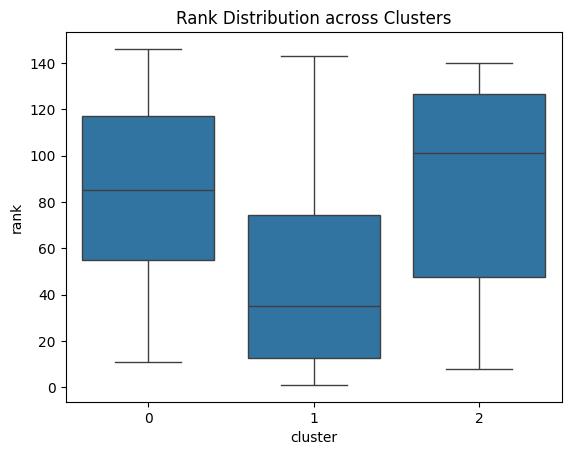

In [28]:
sns.boxplot(x='cluster', y='rank', data=pca_df)
plt.title('Rank Distribution across Clusters')
plt.show()


The scatter plot shows three distinct clusters differentiated primarily along the first principal component (horizontal axis), which suggests this component captures significant variation associated with ROI metrics or rankings. The spread along the second principal component (vertical axis) is less, indicating it captures less but still important variance.

Rank Distribution Across Clusters: <br>

Cluster 0: Shows a wide range of rankings with a median around 60, suggesting this cluster may represent universities that have a moderate correlation between their rankings and financial metrics. <br>
Cluster 1: Appears to consist of higher-ranked universities (lower rank number) with a narrower interquartile range centered around 20. This suggests these universities potentially offer better ROI or are more consistent in the financial metrics used for the analysis. <br>
Cluster 2: Includes universities with generally the lowest rankings (higher rank numbers) and also exhibits a wide range, but the median rank is the highest among the clusters, suggesting they might offer a lower or more variable ROI.

The PCA and K-means clustering analysis revealed three distinct groups of universities characterized by their cost, debt levels, and post-graduation earnings. Cluster 0 consists of low-cost universities with moderate debts and the lowest earnings potential, suggesting a lower return on investment. Cluster 1 includes high-cost universities that surprisingly have lower average debts and significantly higher earnings, indicating a high return on investment, likely due to the prestige and quality of education that attracts better financial aid opportunities and job prospects. Cluster 2 represents a middle-ground with moderate costs and earnings, showing a varied relationship between university rankings and financial metrics. Overall, the analysis underscores how university rankings relate differently to financial outcomes across these clusters, providing insights into the economic implications of educational investments.

In [29]:
college_data['cluster'] = pca_df['cluster']
cluster_metrics = college_data.groupby('cluster').agg({
    'avg_cost': ['mean', 'median'],
    'avg_debt': ['mean', 'median'],
    'earnings_10_yrs': ['mean', 'median'],
    'earnings_6_yrs': ['mean', 'median']
}).reset_index()
print(cluster_metrics)

for i in range(3):  # Assuming three clusters
    cluster_data = college_data[college_data['cluster'] == i]
    correlations = cluster_data[['rank', 'avg_cost', 'avg_debt', 'earnings_10_yrs', 'earnings_6_yrs']].corr()
    print(f"Correlations in Cluster {i}:")
    print(correlations)

  cluster      avg_cost               avg_debt          earnings_10_yrs  \
                   mean   median          mean   median            mean   
0       0  30434.587629  25584.0  20945.731959  21426.0    58870.762887   
1       1  66733.179487  69863.0  17942.692308  16900.0    84822.256410   
2       2  29471.800000  23937.5  19260.000000  20483.5    59718.100000   

           earnings_6_yrs           
    median           mean   median  
0  58274.0   47681.041237  47659.0  
1  80606.0   71373.435897  65748.0  
2  58507.0   49376.000000  48240.5  
Correlations in Cluster 0:
                     rank  avg_cost  avg_debt  earnings_10_yrs  earnings_6_yrs
rank             1.000000  0.087004  0.453884        -0.268763       -0.294358
avg_cost         0.087004  1.000000  0.221930         0.455745        0.347491
avg_debt         0.453884  0.221930  1.000000        -0.143276       -0.065382
earnings_10_yrs -0.268763  0.455745 -0.143276         1.000000        0.900018
earnings_6_yrs  -

In [30]:
def calculate_roi(df, quality_adjust=False):
    def calculate_row_roi(row):
        num_years = 4
        interest_rate = 0.0599
        loan_term_years = 10

        total_cost = (row['avg_cost'] + row['supply_cost']) * num_years

        monthly_interest_rate = interest_rate / 12
        number_of_payments = loan_term_years * 12
        if monthly_interest_rate != 0:
            total_debt_repayment = row['avg_debt'] * (monthly_interest_rate * (1 + monthly_interest_rate) * number_of_payments) / ((1 + monthly_interest_rate) * number_of_payments - 1) * number_of_payments
        else:
            total_debt_repayment = row['avg_debt'] * number_of_payments 

        net_earnings_10_years = (row['earnings_10_yrs'] * 10) - total_cost - total_debt_repayment

        roi_10_years = (net_earnings_10_years / total_cost) * 100

        return roi_10_years

    df['10_years_roi'] = df.apply(calculate_row_roi, axis=1)

    return df

college_data = calculate_roi(college_data)

average_roi_per_cluster = college_data.groupby('cluster')['10_years_roi'].mean()
print(average_roi_per_cluster)

cluster
0    399.349210
1    220.082651
2    393.804275
Name: 10_years_roi, dtype: float64


The results are very interesting. Let's dive deeper to investigate the discrepancy with our previous analysis and the ROI values.

In [31]:
college_data

,institution,avg_cost,supply_cost,avg_debt,75%_earnings_8_yrs,25%_earnings_8_yrs,earnings_6_yrs,earnings_10_yrs,rank,cost_cluster,cluster,10_years_roi
0,Harvard University,71135.0,1000.0,13750.0,135753.0,45980.0,77816.0,84918.0,1,0,1,191.424026
1,Stanford University,69109.0,1455.0,11750.0,166805.0,58448.0,88873.0,97798.0,2,0,1,243.972458
2,Massachusetts Institute of Technology,67430.0,800.0,12500.0,169114.0,75080.0,112623.0,111222.0,3,0,1,304.759598
3,University of California-Berkeley,36739.0,849.0,13478.0,117722.0,44547.0,65914.0,80364.0,4,1,1,429.091183
4,Princeton University,66950.0,1050.0,10750.0,147835.0,56354.0,84713.0,95689.0,5,0,1,249.410629
...,...,...,...,...,...,...,...,...,...,...,...,...
141,University of Memphis,22676.0,1569.0,25000.0,58368.0,25544.0,36243.0,43699.0,142,1,0,335.027624
142,Amherst College,71300.0,1000.0,13500.0,117651.0,40980.0,54333.0,71567.0,143,0,1,144.645881
143,Missouri University of Science and Technology,22012.0,838.0,24250.0,91060.0,43854.0,65427.0,80289.0,144,1,0,762.410062
144,University of North Carolina at Greensboro,19779.0,1312.0,22695.0,55495.0,28133.0,36963.0,44195.0,145,1,0,407.612286


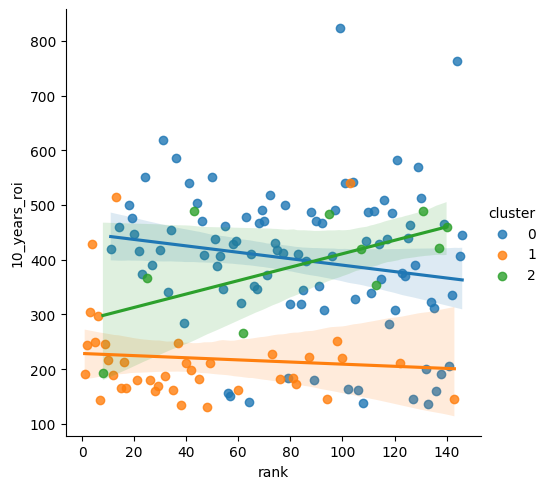

In [33]:
sns.lmplot(x='rank', y='10_years_roi', hue = 'cluster', data=college_data)

The spread of points in the scatter plot indicates variance in ROI within each rank, suggesting that rank alone does not determine ROI. Other factors, possibly specific to each cluster (like type of college, programs offered, regional economic conditions, etc.), also significantly impact ROI.
The lines of best fit help to visualize the average trend but individual data points show substantial variability, indicating that individual college characteristics significantly affect outcomes.

# Ethics & Privacy

In the CWRU rankings dataset, the main source of bias is the determination of what constitutes a university's ranking. It is nearly impossible to holistically declare one school as better than another, so instead the CWRU turns to certain metrics to quantitatively rank these universties. This method of ranking is not explicitly provided, so there may be potential biases originating in the metrics being used or in the analysis which uses potentially biased weights for these metrics to assess the overall quality of an institution However, despite these potential biases, the Center for World University Ranking's frequent updates to their data, their frequency of use in other studies, and their overall reputatition suggests that while these rankings may not be in absolutely perfect order, they are in general reflective of the prestige of schools and therefore are sufficient to draw conclusions about the effect of rank across a large range of rankings.

As for the College Scoreboard data, we may not have an equal amount of data points for determining the financial metrics of each university, so this data may not cover all of the school equally. There could be factors such as geographical bias based on where the writers of the reports and datasets are located. It also might have socioeconomic biases due to the fact that some economic factors such as the ability to afford college can be obscured in the data and not depict situations fairly. However, the fact that is that there are no individuals in the dataset but rather generalized statistics leads to some normalization and increased accuracy of the metrics across a large number of students at each institution. Conversely, this brings the method of data collection into question. Considering that the data found in the College Scoreboard is sourced from government data and individual institutions, the authority of these data sources contribute to an increased likelihood of their accurate depiction of our desired metrics, reducing the likelihood of bias.

It is important to note that any generic conclusions or patterns presented in this report should not be viewed as absolute statements or actionable information. While our analysis is conducted in a way that minimizes bias, it remains impossible to eleminate all potential sources of bias and note that confounding factors such as socioeconomic class, which influences college decisions and financial basis and career opportunities, could be strong contributers to our results. Even if we were able to ensure unbiased, purely objective analyses, it is important to note that this ranking is no way definitive of salary outcomes. While students at certain universities may be more likely on average to meet certain financial metrics, attendance of a specific university does not guarantee these outcomes and should not be interpreted as such.

Also, considering that we use aggregate representations of our variables of interest at each of these insitutions, it is important to note that these results cannot be generalized to the students at a given university, but rather only the average metrics of a specified university.

# Team Expectations 


* Respond to messages from other team members within 24 hours
* Weekly check-in to update team progress
* If a member has to miss a meeting, message the other members
* Treat all members with respect
* Always be willing to help out members if they ask
* Get the work done assigned to you in a timely manner
* Communicate with the rest of the team if you're stuck

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/1  |  5 PM | Brainstorm ideas for projects  | Determine our research question and split up Project Proposal sections | 
| 5/8  |  5 PM | Identify potential data sources  | Finalize data sources and plan for data schema. Assign data wrangling tasks | 
| 5/15  | 5 PM  | Complete data wrangling necessary for EDA  | Discuss goals of EDA and what we are looking for | 
| 5/22  | 5 PM  | Complete EDA  | Compare results for EDA and do writeup. Discuss plans for analysis and assign individual tasks | 
| 5/29  | 5 PM  | Start individual analysis tasks  | Compare analysis results | 
| 6/4  | 5 PM  | Refine analysis and start drafting final write-up sections  | Finalize analysis and focus on writeup | 
| 5/11 | 5 PM  | Finish writeup second drafts | Finalize project and submit |